In [101]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import re

# Load Data

In [102]:
data_set = [
    {"title": "title1", "label": 1},
    {"title": "title2, adsf", "label": 0},
    {"title": "title3, adsf", "label": 1},
    {"title": "title4, adsf", "label": 2},
    {"title": "title4, adsf", "label": 3},
    {"title": "title4, adsf", "label": 4},
    {"title": "title4, adsf", "label": 5},
    {"title": "title4, adsf", "label": 6},
    {"title": "title4, adsf", "label": 7},
    {"title": "title4, adsf", "label": 8},
    {"title": "title4, adsf", "label": 2},
    {"title": "title4, adsf", "label": 3},
    {"title": "title4, adsf", "label": 4},
    {"title": "title4, adsf", "label": 5},
    {"title": "title4, adsf", "label": 6},
    {"title": "title4, adsf", "label": 7},
    {"title": "title4, adsf", "label": 8},
]

## Transform data

In [103]:
def check_comma_erros(string):
    """
    Checks if a string has at least one comma followed by a space,
    and ensures the comma is not at the end of the string.
    1 -> Comma error present
    0 -> Comma error not present
    """
    string = string.strip()
    if len(string) == 0:
        return 1

    if string[-1] == ',':
        return 1
    if string[0] == ',':
        return 1

    comma_mentioned = 1
    for i, letter in enumerate(string):
        if letter == ',':
            comma_mentioned = 0
            if len(string) == i+1:
                return 1
            if string[i+1] != ' ':
                return 1
    
    return comma_mentioned

def find_abbreviations_binary(text):
    """
    Function to find abbreviations in a given text string, returning a binary score (0 or 1)
    indicating the presence of abbreviations
    
    Args:
    text (str): The text string to analyze.
    
    Returns:
    integer: A binary score (0 or 1).
    """
    # Regular expression to match potential abbreviations
    abbreviation_pattern = r'([A-Z]{3,}|[.])'

    # Find all matches
    potential_abbreviations = re.findall(abbreviation_pattern, text)

    # Binary score: 1 if there are any abbreviations, 0 otherwise
    return 1 if potential_abbreviations else 0

def find_length(text):
    """
    Function to find the length of a given text string
    
    Args:
    text (str): The text string to analyze.
    
    Returns:
    integer: The length of the text string.
    """
    return len(text)

In [104]:
x = []
y = []

for row in data_set:
    x.append([
        find_length(row["title"]),
        check_comma_erros(row["title"]),
        find_abbreviations_binary(row["title"]),
    ])
    y.append(row["label"])

print(f"x: {x}")
print(f"y: {y}")

x: [[6, 1, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0]]
y: [1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7, 8]


### Split data

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")
print(f"x_test: {x_test}")
print(f"y_test: {y_test}")

x_train: [[12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0], [6, 1, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0]]
y_train: [5, 3, 1, 6, 2, 6, 8, 3, 2, 1, 4, 7, 4]
x_test: [[12, 0, 0], [12, 0, 0], [12, 0, 0], [12, 0, 0]]
y_test: [0, 5, 7, 8]


### Standardize data

In [106]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

print(f"Standardized: {x_train}")

Standardized: [[ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [-3.46410162  3.46410162  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]
 [ 0.28867513 -0.28867513  0.        ]]


## Create Model

In [107]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

## Evaluate Model

In [108]:
print(f"Score (train): {model.score(x_train, y_train)}")
print(f"Score (test): {model.score(x_test, y_test)}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Predict_proba: {model.predict_proba(x_test)}")
print(f"Predict: {model.predict(x_test)}")

Score (train): 0.23076923076923078
Score (test): 0.0
Intercept: [-1.15853692 -1.1534584  -1.1534584  -1.1534584  -1.46000501 -1.1534584
 -1.46000501 -1.46000501]
Coefficients: [[-0.56242615  0.56242615  0.        ]
 [ 0.12009943 -0.12009943  0.        ]
 [ 0.12009943 -0.12009943  0.        ]
 [ 0.12009943 -0.12009943  0.        ]
 [ 0.06434358 -0.06434358  0.        ]
 [ 0.12009943 -0.12009943  0.        ]
 [ 0.06434358 -0.06434358  0.        ]
 [ 0.06434358 -0.06434358  0.        ]]
Predict_proba: [[1.11800025e-04 1.73709065e-01 1.73709065e-01 1.73709065e-01
  1.01683979e-01 1.73709065e-01 1.01683979e-01 1.01683979e-01]
 [1.11800025e-04 1.73709065e-01 1.73709065e-01 1.73709065e-01
  1.01683979e-01 1.73709065e-01 1.01683979e-01 1.01683979e-01]
 [1.11800025e-04 1.73709065e-01 1.73709065e-01 1.73709065e-01
  1.01683979e-01 1.73709065e-01 1.01683979e-01 1.01683979e-01]
 [1.11800025e-04 1.73709065e-01 1.73709065e-01 1.73709065e-01
  1.01683979e-01 1.73709065e-01 1.01683979e-01 1.01683979e-

### Confuction Matrix

In [109]:
cm = confusion_matrix(y_train, model.predict(x_train))
print(f"Confusion matrix: {cm}")

Confusion matrix: [[1 1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


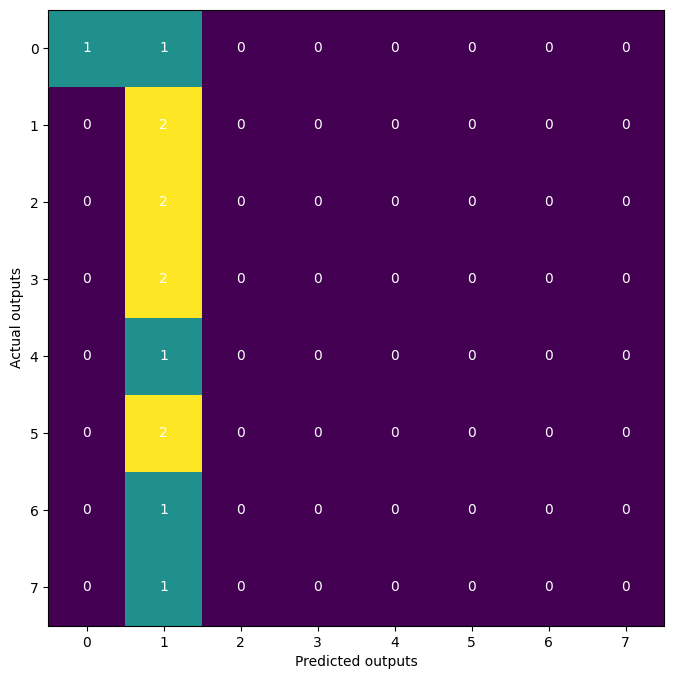

In [110]:


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(8))
ax.yaxis.set(ticks=range(8))
ax.set_ylim(7.5, -0.5)
for i in range(8):
    for j in range(8):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### Graph

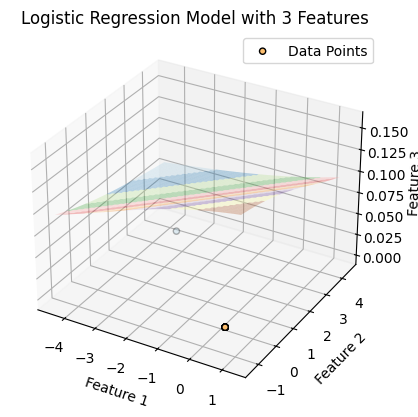

In [111]:
from mpl_toolkits.mplot3d import Axes3D

X = x_train
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_train, edgecolor='k', cmap=plt.cm.Paired, label='Data Points')

# Create a meshgrid for two features (e.g., feature 1 and feature 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Predict the third feature (feature 3) using the model
# You might need to adjust the prediction based on how your model is structured
zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])[:, 1]
zz = zz.reshape(xx.shape)

# Plot decision boundary surface
ax.plot_surface(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Logistic Regression Model with 3 Features')
plt.legend()
plt.show()